In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import time

In [3]:
x=pd.read_csv("10_x.csv")
y=pd.read_csv("10_y.csv")

In [ ]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/10_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/10_y.csv",
                header=None)

In [4]:
x,y

(     -1.5901032954166512  -1.0233075548231088  0.13989093895367655  \
 0              -0.235861            -1.108386             2.553156   
 1               0.037993            -2.136154             0.903113   
 2              -1.170747            -1.549586             1.827438   
 3               1.060144            -1.086193            -1.251762   
 4               1.181337            -2.542100            -1.429668   
 ..                   ...                  ...                  ...   
 431             1.118841             0.345085             1.847087   
 432            -0.749348             1.154446            -0.006490   
 433            -0.064161            -0.576409            -0.831027   
 434            -0.016386             0.189571            -0.952488   
 435            -0.360963            -1.719303             0.088247   
 
      1.3519446507615345  0.9986850464187683  
 0             -1.911015            0.859437  
 1              1.095856            1.024503  
 2   

In [5]:
x.shape, y.shape

((436, 5), (436, 1))

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной

0.9948520565839067


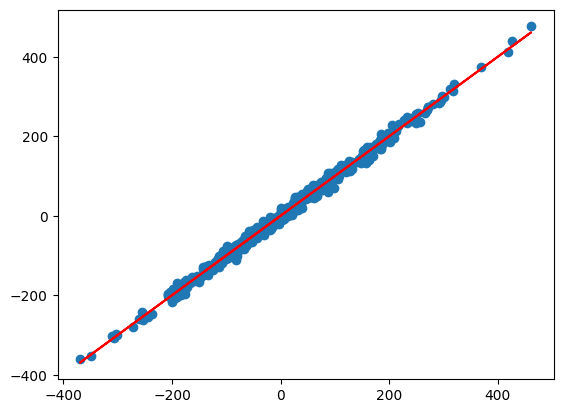

In [6]:
model = LinearRegression()
model.fit(x, y)
print(model.score(x, y))
y_pred = model.predict(x)
plt.scatter(y_pred, y)
plt.plot(y_pred, y_pred, c='r')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


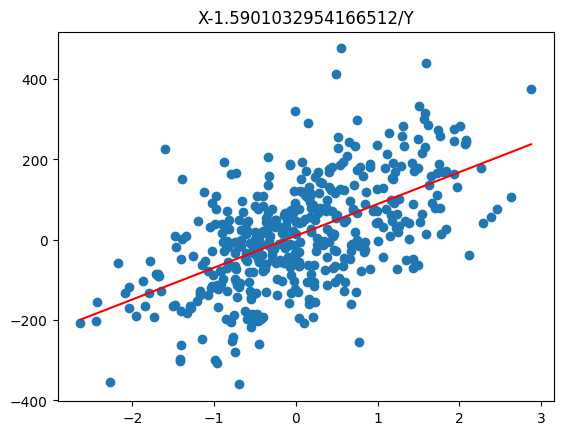

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


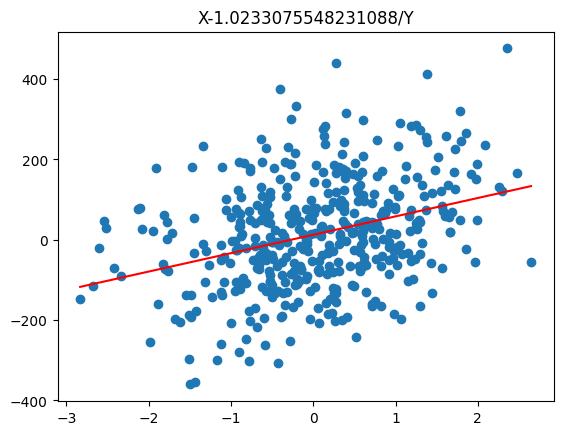

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


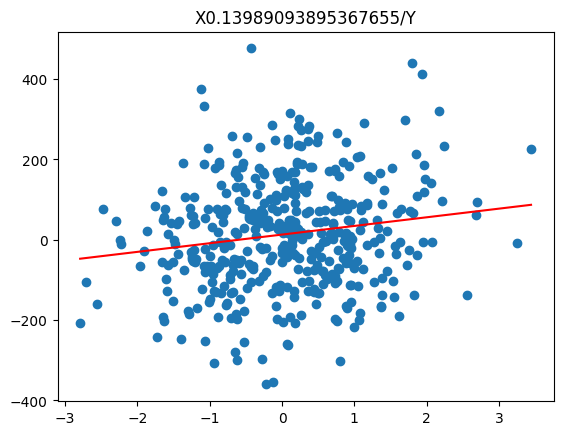

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


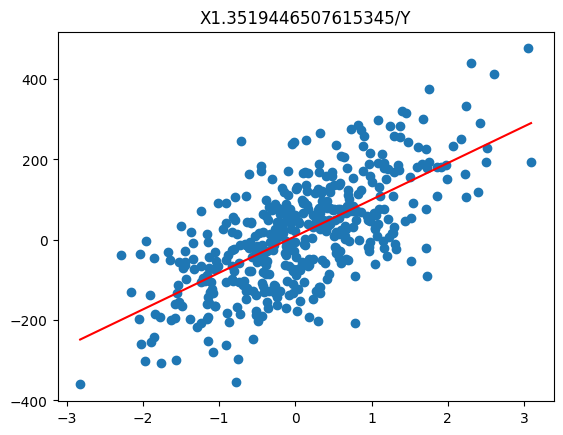

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


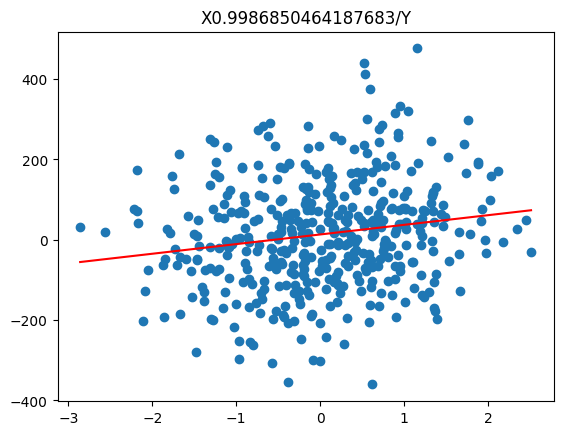

In [7]:
for i in x.columns:
    model.fit(x[[i]], y)
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, model.predict(xx), c='r')
    plt.title(f'X{i}/Y')
    plt.show()

(*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b = None

    def predict(self, X):
        return X.dot(self.b)

    def error(self, X, Y):
        return np.mean((self.predict(X) - Y)**2, axis=0) / 2

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        m, n = X.shape
        self.b = np.zeros(n)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ = X.T.dot(self.predict(X) - Y) / m
            self.b -= alpha * dJ
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if np.all(np.abs(new_err - errors[-2]) < accuracy):
                break
        return steps, errors

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [ ]:
def generate_degrees(source_data: list, degree: int):
       return np.array([source_data**n for n in range(1, degree + 1)]).T
generate_degrees(x[[1]],2)

array([[[-1.02330755e+00,  1.04715835e+00],
        [-1.10838575e+00,  1.22851898e+00],
        [-2.13615380e+00,  4.56315305e+00],
        [-1.54958635e+00,  2.40121785e+00],
        [-1.08619268e+00,  1.17981454e+00],
        [-2.54209973e+00,  6.46227105e+00],
        [-2.35820493e-01,  5.56113047e-02],
        [-2.75026389e-01,  7.56395146e-02],
        [ 3.66380165e-01,  1.34234425e-01],
        [ 4.90892708e-01,  2.40975651e-01],
        [-5.76717395e-02,  3.32602954e-03],
        [ 2.26291825e+00,  5.12079900e+00],
        [ 1.65304419e+00,  2.73255508e+00],
        [ 3.78454105e-01,  1.43227510e-01],
        [ 2.73692021e-01,  7.49073222e-02],
        [-1.62593790e-01,  2.64367404e-02],
        [-2.49339057e-01,  6.21699654e-02],
        [-1.78268397e-01,  3.17796212e-02],
        [-8.94080890e-01,  7.99380638e-01],
        [ 3.81292915e-01,  1.45384287e-01],
        [-3.84404385e-01,  1.47766731e-01],
        [-4.71787951e-01,  2.22583871e-01],
        [ 1.38920929e-01,  1.929

In [ ]:
def generate_degrees(source_data: list, degree: int):
       return np.array([source_data**n for n in range(1, degree + 1)]).T
generate_degrees(x[[1]],3)

array([[[-1.02330755e+00,  1.04715835e+00, -1.07156505e+00],
        [-1.10838575e+00,  1.22851898e+00, -1.36167294e+00],
        [-2.13615380e+00,  4.56315305e+00, -9.74759671e+00],
        ...,
        [-5.76409045e-01,  3.32247387e-01, -1.91510399e-01],
        [ 1.89570972e-01,  3.59371535e-02,  6.81264113e-03],
        [-1.71930334e+00,  2.95600397e+00, -5.08226749e+00]]])

In [ ]:
def generate_degrees(source_data: list, degree: int):
       return np.array([source_data**n for n in range(1, degree + 1)]).T
generate_degrees(x[[1]],10)

array([[[-1.02330755e+00,  1.04715835e+00, -1.07156505e+00, ...,
          1.20240132e+00, -1.23042635e+00,  1.25910458e+00],
        [-1.10838575e+00,  1.22851898e+00, -1.36167294e+00, ...,
          2.27786239e+00, -2.52475022e+00,  2.79839718e+00],
        [-2.13615380e+00,  4.56315305e+00, -9.74759671e+00, ...,
          4.33570915e+02, -9.26174156e+02,  1.97845044e+03],
        ...,
        [-5.76409045e-01,  3.32247387e-01, -1.91510399e-01, ...,
          1.21855826e-02, -7.02388003e-03,  4.04862798e-03],
        [ 1.89570972e-01,  3.59371535e-02,  6.81264113e-03, ...,
          1.66791802e-06,  3.16188840e-07,  5.99402258e-08],
        [-1.71930334e+00,  2.95600397e+00, -5.08226749e+00, ...,
          7.63519355e+01, -1.31272138e+02,  2.25696624e+02]]])

In [ ]:
np.polyfit(x[1], y, 3)

array([[-0.24175132],
       [ 7.12088562],
       [46.71200693],
       [ 5.43573566]])

In [ ]:
np.polyfit(x[1], y, 2)

array([[ 7.19827831],
       [46.03318008],
       [ 5.38366731]])

In [ ]:
np.polyfit(x[1], y, 10)

array([[  0.09830788],
       [ -0.21676212],
       [ -2.5057122 ],
       [  3.11152195],
       [ 16.91523419],
       [-17.39217541],
       [-30.79803503],
       [ 41.54113547],
       [  3.12976528],
       [ 20.6732917 ],
       [ 12.48511149]])

In [ ]:
x1=x[1]
x1= x1.values.reshape(-1, 1)
x1

array([[-1.02330755e+00],
       [-1.10838575e+00],
       [-2.13615380e+00],
       [-1.54958635e+00],
       [-1.08619268e+00],
       [-2.54209973e+00],
       [-2.35820493e-01],
       [-2.75026389e-01],
       [ 3.66380165e-01],
       [ 4.90892708e-01],
       [-5.76717395e-02],
       [ 2.26291825e+00],
       [ 1.65304419e+00],
       [ 3.78454105e-01],
       [ 2.73692021e-01],
       [-1.62593790e-01],
       [-2.49339057e-01],
       [-1.78268397e-01],
       [-8.94080890e-01],
       [ 3.81292915e-01],
       [-3.84404385e-01],
       [-4.71787951e-01],
       [ 1.38920929e-01],
       [-7.87143674e-01],
       [-8.93961592e-01],
       [ 1.57699822e-01],
       [-2.59822993e+00],
       [ 3.23789725e-01],
       [ 1.78759654e+00],
       [ 2.26107880e-01],
       [ 1.65650045e+00],
       [ 9.24176562e-02],
       [ 1.04722736e+00],
       [ 1.00092778e+00],
       [-2.81639458e-01],
       [-7.06805248e-01],
       [-3.48407367e-01],
       [ 6.41503526e-01],
       [-8.9

In [ ]:
    print(f"Coefficients: {model.coef_}")
    print(f"\nIntercept: {model.intercept_}")
    print(f"\nR-squared score: {model.score(x_poly, y)}")

Coefficients: [[  0.          20.6732917    3.12976528  41.54113547 -30.79803503
  -17.39217541  16.91523419   3.11152195  -2.5057122   -0.21676212
    0.09830788]]

Intercept: [12.48511149]

R-squared score: 0.13757749216723691


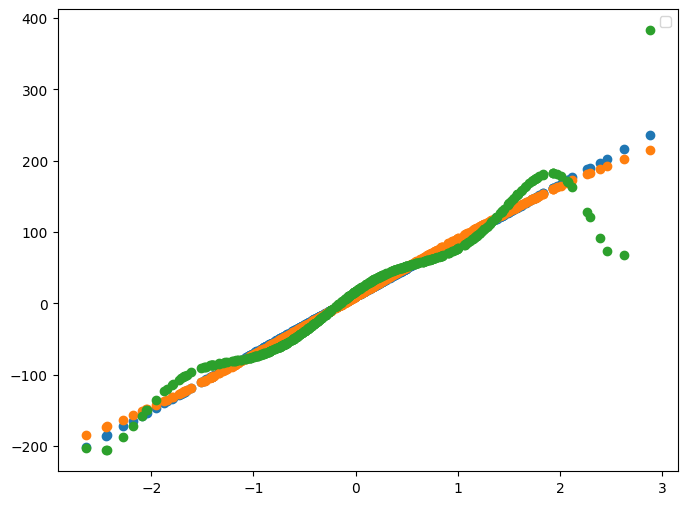

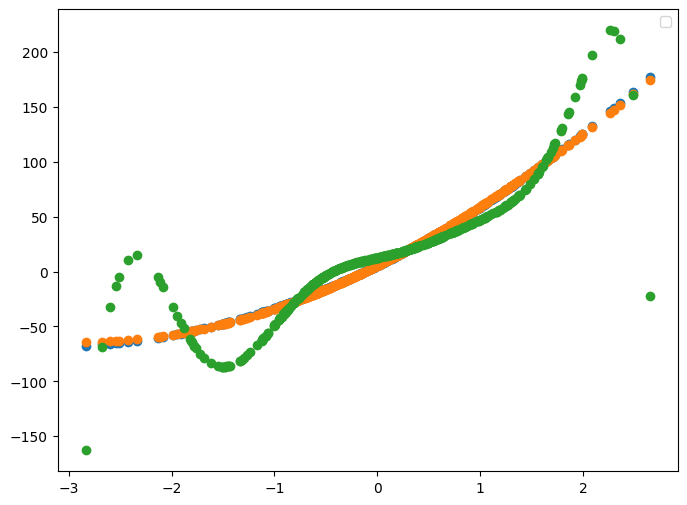

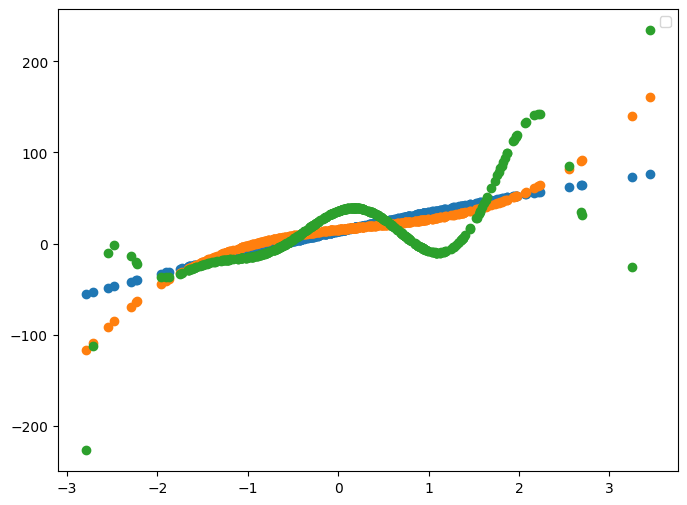

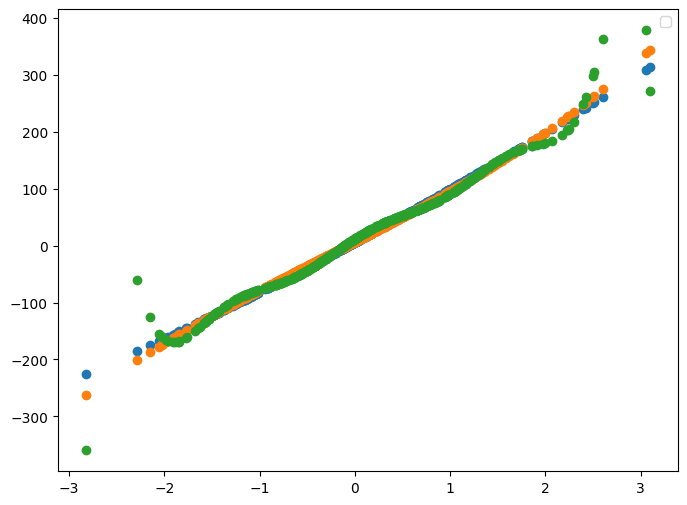

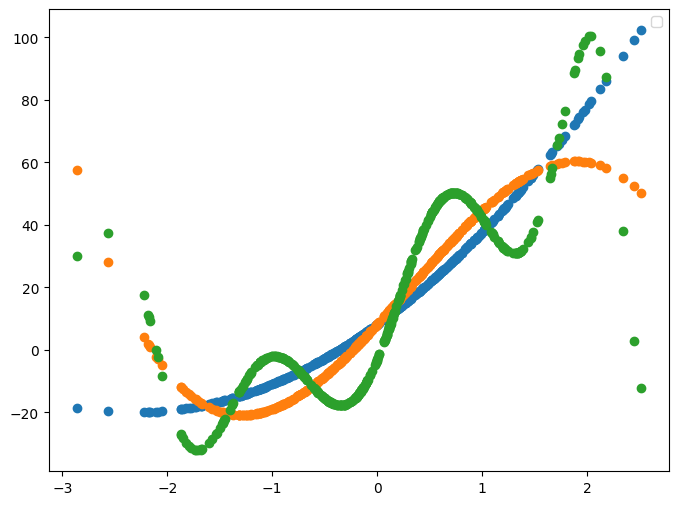

In [16]:
orders = [2, 3, 10]
for i in x.columns:
    plt.figure(figsize=(8, 6))
    for j, index in enumerate(orders):
        poly = make_pipeline(PolynomialFeatures(index), LinearRegression())
        poly.fit(x[[i]], y)
        y_pred = poly.predict(x[[i]])
        plt.scatter(x[[i]], y_pred)
    plt.legend()
    plt.show()

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.


точность построенной модели 0 : 0.2743777773679985

точность построенной модели 1 : 0.11065024455483086

точность построенной модели 2 : -0.006963871141843159

точность построенной модели 3 : 0.3373124676327227

точность построенной модели 4 : 0.004615090705667568


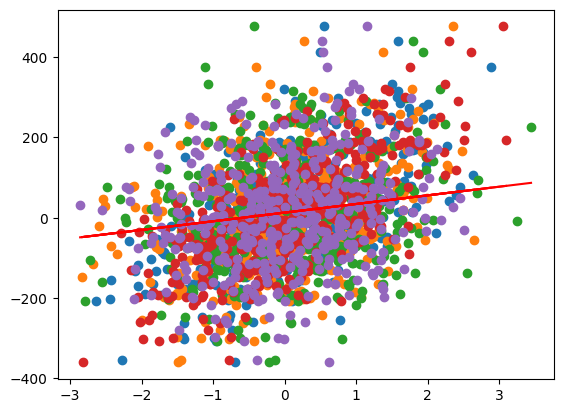

In [ ]:
for i in range(5):
    print(f'\nточность построенной модели {i} : {binary_1.score(x[[i]],y)}')
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')

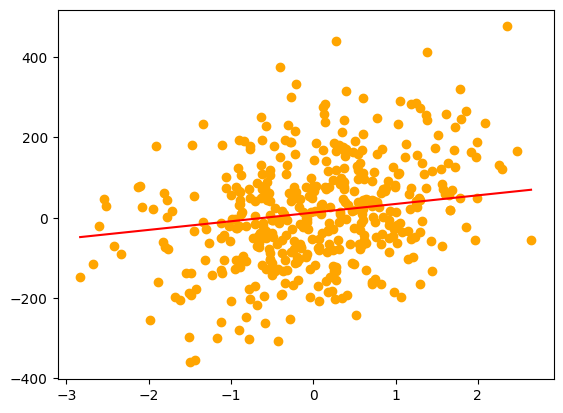

In [ ]:
plt.scatter(x[1], y, c='orange')
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

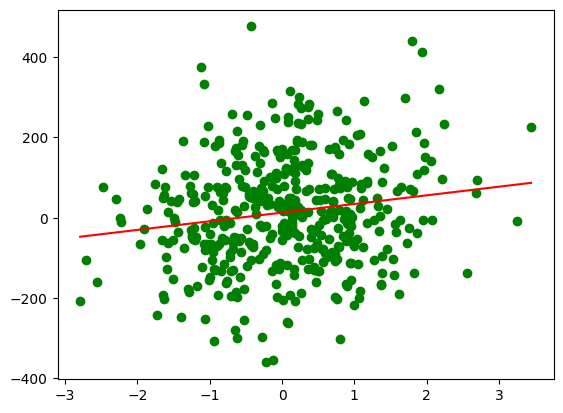

In [ ]:
plt.scatter(x[2], y, c='green')
xx = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

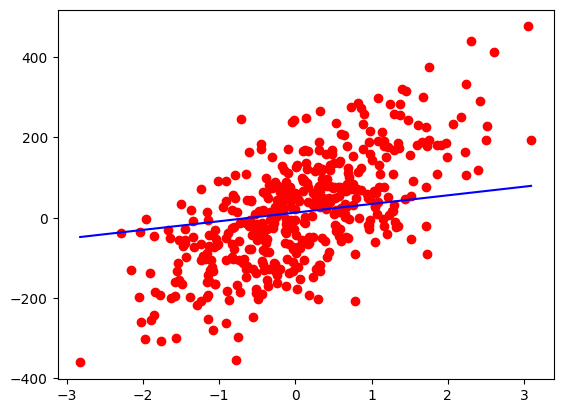

In [ ]:
plt.scatter(x[3], y, c='red')
xx = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='b')

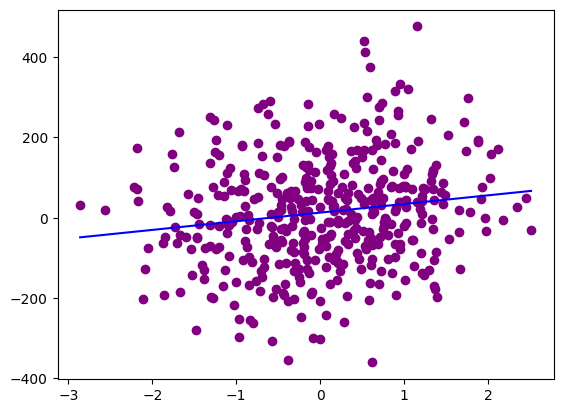

In [ ]:
plt.scatter(x[4], y, c='purple')
xx = np.linspace(x[4].min(), x[4].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='b')

In [29]:
res = pd.DataFrame(columns=['X','R^2', 'MAE', 'MSE'])

In [30]:
for i in x.columns:
    x_i = x[[i]]
    x_train, x_test, y_train, y_test = train_test_split(x_i, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    res.loc[i] = [f'X{i}', r_squared, mae, mse]

In [32]:
res

,X,R^2,MAE,MSE
-1.5901032954166512,X-1.5901032954166512,0.247744,99.485431,16683.001216
-1.0233075548231088,X-1.0233075548231088,0.172352,109.823754,18355.001694
0.13989093895367655,X0.13989093895367655,0.051899,115.413168,21026.318464
1.3519446507615345,X1.3519446507615345,0.519708,81.057140,10651.580506
0.9986850464187683,X0.9986850464187683,0.042838,114.266594,21227.272284


Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
s=0
for i in range(437):
      s+=float(y[0][i]-yr[i])
RMSE=np.sqrt(s**2/437)
RMSE

4.14676396578263e-14

In [ ]:
s=[]
for i in range(437):
      s.append(abs(float(y[0][i]-yr[i])))
MAE=np.mean(s)/437
MAE

0.2290080805120583

In [34]:
res = pd.DataFrame(columns=['RMSE','MAPE'])
for i in x.columns:
    x_i = x[[i]]
    x_train, x_test, y_train, y_test = train_test_split(x_i, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    res.loc[i] = [rmse, mape]

In [35]:
res

,RMSE,MAPE
-1.5901032954166512,129.162693,1.319511
-1.0233075548231088,135.480632,1.175127
0.13989093895367655,145.004546,1.060274
1.3519446507615345,103.206494,1.437551
0.9986850464187683,145.695821,0.996177


(*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [52]:
x = pd.read_csv("10_x.csv", header = None)
poly = PolynomialFeatures(degree = 2, include_bias= False) # степень
start = time.time()  #данный момент
poly_features = poly.fit_transform(x)
end = time.time()
print('2 step', '\ntime:', end - start)

2 step 
time: 0.003635406494140625


In [51]:
x = pd.read_csv("10_x.csv", header = None)
poly = PolynomialFeatures(degree = 3, include_bias= False) # степень
start = time.time()  #данный момент
poly_features = poly.fit_transform(x)
end = time.time()
print('3 step', '\ntime:', end - start)

3 step 
time: 0.0023450851440429688


In [53]:
x = pd.read_csv("10_x.csv", header = None)
poly = PolynomialFeatures(degree = 10, include_bias= False) # степень
start = time.time()  #данный момент
poly_features = poly.fit_transform(x)
end = time.time()
print('10 step', '\ntime:', end - start)

10 step 
time: 0.008751153945922852
